# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset

This dataset collects information from over one hundred thousand medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patients are included for each appointment:

* Patient ID - Unique identification number assigned to the patient
* Appointment ID - Unique identification number assigned to the appointment
* Gender - Gender of the patient
* Scheduled Day - The day the patient made the booking for the appointment
* Appointment Day - The day of the appointment 
* Age - The age of the patient
* Neighbourhood - Location of medical practice
* Scholarship - Whether or no the patient receives welfare support
* Hypertension - Whether or not the patient has hypertension
* Diabetes - Whether or not the patient has diabetes
* Alcoholism - Whether or not the patient has alcoholism
* Handicap - How many disabilities the patient has
* SMS Received - Whether or not the patient received an SMS text reminder for the appointment
* No Show - Whether or not the patient attended the appointment

### Questions

* Are people who receive the SMS text reminder more likely to attend their appointment?
* Do medical practices in different neighbourhoods receive similar proportions of 'No show' appointments?
* Are patients with the health conditions stated more or less likely to miss an appointment?

### Importing Required Python Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [50]:
# Read the csv file and assign to the variable 'df'
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [51]:
# First look at how the data is presented
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Observations:
* There are typos and poorly formatted labels for columns.
* The 'ScheduledDay' values have a date and time, the 'AppointmentDay' values only have a date (the time shown as midnight is surely not correct)
* The 'No-show' values are given as 'Yes' or 'No' rather than '0' '1' or 'True' 'False'

In [52]:
# Identify columns with null values, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Observations:
* There are no null values
* Gender, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and No-show could be changed from object/int64 values to categorical/boolean values to reduce memory usage and make them simpler to visualise
* ScheduledDay and AppointmentDay are objects instead of datetimes

In [53]:
# Identify which columns would suit a categorical or boolean data type
df.value_counts('Gender')

Gender
F    71840
M    38687
dtype: int64

In [54]:
df.value_counts('Neighbourhood')

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Length: 81, dtype: int64

In [55]:
df.value_counts('Scholarship')

Scholarship
0    99666
1    10861
dtype: int64

In [56]:
df.value_counts('Hipertension')

Hipertension
0    88726
1    21801
dtype: int64

In [57]:
df.value_counts('Diabetes')

Diabetes
0    102584
1      7943
dtype: int64

In [58]:
df.value_counts('Alcoholism')

Alcoholism
0    107167
1      3360
dtype: int64

In [59]:
df.value_counts('Handcap')

Handcap
0    108286
1      2042
2       183
3        13
4         3
dtype: int64

In [60]:
df.value_counts('SMS_received')

SMS_received
0    75045
1    35482
dtype: int64

In [61]:
df.value_counts('No-show')

No-show
No     88208
Yes    22319
dtype: int64

Observations:
* Gender, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, and No-show suits boolean
* Neighbourhood suits categorical
* Handicap suits int8

In [62]:
# Identify the average and spread of the data
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


Observations:
* There are only 27 unique values for AppointmentDay. If the time value in ScheduledDay were to be removed I expect a similarly condensed set of values could be achieved
* The minimum age is impossible and the maximum age is unlikely
* The 81 Neighbourhood values may contain typos or differences in format to create duplicates


### Data Cleaning
 

1. Remove columns not relevant to our analysis
2. Rename columns to remove typos and improve format
3. Check Neighbourhood data for typos/duplicates and correct if necessary
4. Change the data types to save memory and improve ease of visualisation

In [63]:
# Remove irrelevant columns
df.drop(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship'], axis=1, inplace=True)

In [64]:
# Rename remaining columns to correct format
new_names = {'PatientId': 'Patient_ID',
            'AppointmentID': 'Appointment_ID',
            'Neighbourhood': 'District',
            'Hipertension': 'Hypertension',
            'Diabetes': 'Diabetes',
            'Alcoholism': 'Alcoholism',
            'Handcap': 'Handicap',
            'SMS_received': 'SMS',
            'No-show': 'Present'}
df.rename(columns=new_names, inplace=True)
df.head()

,Patient_ID,Appointment_ID,District,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Present
0,2.987250e+13,5642903,JARDIM DA PENHA,1,0,0,0,0,No
1,5.589978e+14,5642503,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,5642828,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,5642494,JARDIM DA PENHA,1,1,0,0,0,No


In [65]:
# Checking 'District' for typos leading to repeated values
districts = df['District'].tolist()
set(districts)

{'AEROPORTO',
 'ANDORINHAS',
 'ANTÔNIO HONÓRIO',
 'ARIOVALDO FAVALESSA',
 'BARRO VERMELHO',
 'BELA VISTA',
 'BENTO FERREIRA',
 'BOA VISTA',
 'BONFIM',
 'CARATOÍRA',
 'CENTRO',
 'COMDUSA',
 'CONQUISTA',
 'CONSOLAÇÃO',
 'CRUZAMENTO',
 'DA PENHA',
 'DE LOURDES',
 'DO CABRAL',
 'DO MOSCOSO',
 'DO QUADRO',
 'ENSEADA DO SUÁ',
 'ESTRELINHA',
 'FONTE GRANDE',
 'FORTE SÃO JOÃO',
 'FRADINHOS',
 'GOIABEIRAS',
 'GRANDE VITÓRIA',
 'GURIGICA',
 'HORTO',
 'ILHA DAS CAIEIRAS',
 'ILHA DE SANTA MARIA',
 'ILHA DO BOI',
 'ILHA DO FRADE',
 'ILHA DO PRÍNCIPE',
 'ILHAS OCEÂNICAS DE TRINDADE',
 'INHANGUETÁ',
 'ITARARÉ',
 'JABOUR',
 'JARDIM CAMBURI',
 'JARDIM DA PENHA',
 'JESUS DE NAZARETH',
 'JOANA D´ARC',
 'JUCUTUQUARA',
 'MARIA ORTIZ',
 'MARUÍPE',
 'MATA DA PRAIA',
 'MONTE BELO',
 'MORADA DE CAMBURI',
 'MÁRIO CYPRESTE',
 'NAZARETH',
 'NOVA PALESTINA',
 'PARQUE INDUSTRIAL',
 'PARQUE MOSCOSO',
 'PIEDADE',
 'PONTAL DE CAMBURI',
 'PRAIA DO CANTO',
 'PRAIA DO SUÁ',
 'REDENÇÃO',
 'REPÚBLICA',
 'RESISTÊNCIA',
 'RO

In [66]:
# No typos found in 'District' so no action taken

# Changing 'Present' format to allow conversion to boolean and remove the potentially misleading double negative

df.loc[df.Present == 'Yes', ['Present']] = '0'
df.loc[df.Present == 'No', ['Present']] = '1'
df.Present = pd.to_numeric(df.Present)
# Changing data types to reduce memory usage

def boo(column):
    df[column] = df[column].astype('bool')
    
boo('Hypertension')
boo('Diabetes')
boo('Alcoholism')
boo('Present')
boo('SMS')

df.District = df.District.astype('category')
df.Handicap = df.Handicap.astype('int8')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Patient_ID      110527 non-null  float64 
 1   Appointment_ID  110527 non-null  int64   
 2   District        110527 non-null  category
 3   Hypertension    110527 non-null  bool    
 4   Diabetes        110527 non-null  bool    
 5   Alcoholism      110527 non-null  bool    
 6   Handicap        110527 non-null  int8    
 7   SMS             110527 non-null  bool    
 8   Present         110527 non-null  bool    
dtypes: bool(5), category(1), float64(1), int64(1), int8(1)
memory usage: 2.4 MB


In [67]:
df.head()

,Patient_ID,Appointment_ID,District,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Present
0,2.987250e+13,5642903,JARDIM DA PENHA,True,False,False,0,False,True
1,5.589978e+14,5642503,JARDIM DA PENHA,False,False,False,0,False,True
2,4.262962e+12,5642549,MATA DA PRAIA,False,False,False,0,False,True
3,8.679512e+11,5642828,PONTAL DE CAMBURI,False,False,False,0,False,True
4,8.841186e+12,5642494,JARDIM DA PENHA,True,True,False,0,False,True


#### Cleaning Complete
As shown by the info and head methods: only the relevant data remains; the memory usage has been significantly reduced; and the variables have been given more appropriate labels and value types.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Are people who receive the SMS text reminder more likely to attend their appointment?

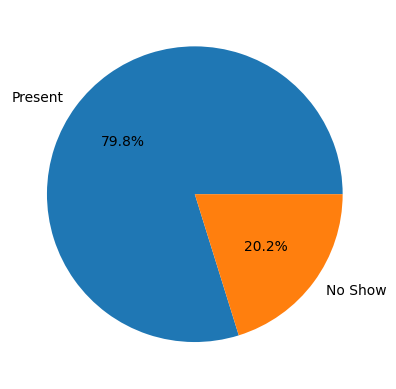

In [68]:
# First show the overall perectange of missed appointments as a bench mark using a pie chart
show = df.Present.value_counts()
pie = [show[0], pie[1]]
plot = plt.pie(pie, labels = ['Present', 'No Show'], autopct = '%1.1f%%')


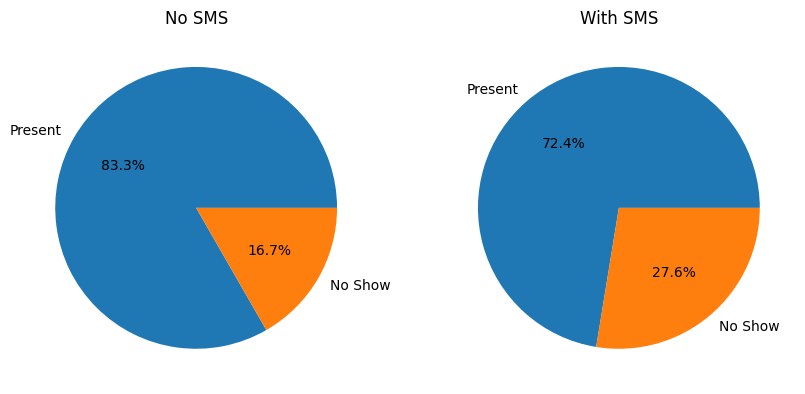

In [69]:
# This can be shown simply by two pie charts to show the proportion of missed appointments for those who did and 
# did not receive the SMS

# Assign variables to the data used for plotting the pies
group = df.groupby(['SMS']).value_counts(['Present'])
pie_1 = [group[0], group[1]]
pie_2 = [group[2], group[3]]
labels = ['Present', 'No Show']

# Plot the pies
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(pie_1, labels = labels, autopct = '%1.1f%%');
ax1.set_title('No SMS');
ax2.pie(pie_2, labels = labels, autopct = '%1.1f%%');
ax2.set_title('With SMS');

### Research Question 2: Do medical practices in different neighbourhoods receive similar proportions of 'No show' appointments?

In [70]:
# Different districts will have different populations so it is important to find the proportion of no shows per district
# in order to make a fair comparison

# Create a list of the Districts
districts = list(set(df['District'].tolist()))

# Create a list of the percentages
group = df.groupby(['District']).value_counts(['Present'])
pcents = []
for i in range(0, 162, 2):
    pcents.append((group[i+1] / (group[i] + group[i+1])*100))

# Create a new dataframe of Districts and their percentage of no shows. Ordered in reverse by percentage.
df_1 = pd.DataFrame(dict(districts=districts, pcents=pcents)).sort_values('pcents', ascending = False)

# Horizontal bar plot to show the percentage of no shows per District
fig, ax = plt.subplots(figsize = (16,30))
ax.barh('districts', 'pcents', data = df_1)

# Remove spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
# Add title    
ax.set_title('Percentage of No Shows per District', fontsize = 20, loc = 'left');

# Add axis labels
plt.xlabel('No Shows [%]', fontsize = 18)
plt.ylabel('District', fontsize = 18)
# Add gridlines
ax.grid(visible = True, color = 'grey', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

# Add padding
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add bar labels
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()),2)),fontsize = 10, fontweight = 'bold',color = 'grey')


In [71]:
# Display mean and standard deviation
df_1['pcents'].describe()

count    81.000000
mean     19.308100
std       4.398795
min       0.000000
25%      17.975289
50%      19.702602
75%      21.648963
max      28.918495
Name: pcents, dtype: float64

### Research Question 3: Are patients with the health conditions stated more or less likely to miss an appointment?

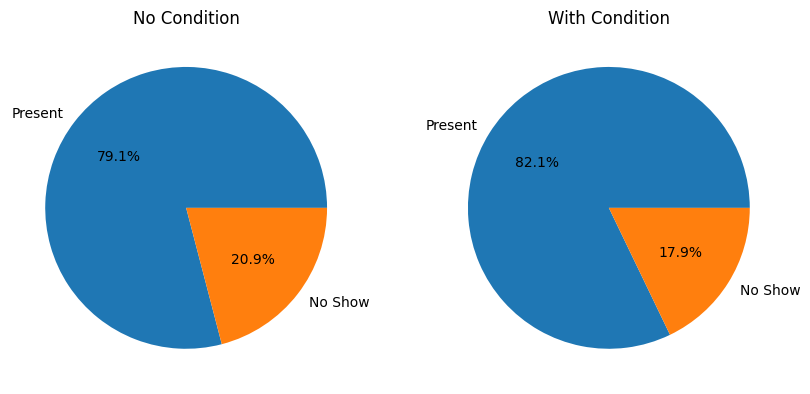

In [72]:
# This can be shown simply by two pie charts to show the proportion of missed appointments for those who do and 
# do not have a pre-existing condition

# Creating a new data frame with added column for 'Condition'
df_2 = df.reset_index()
df_2['Condition'] = df_2['Hypertension'] | df_2['Diabetes'] | df_2['Alcoholism'] | df_2['Handicap']

# Assign variables to the data used for plotting the pies
group = df_2.groupby(['Condition']).value_counts(['Present'])
pie_1 = [group[0], group[1]]
pie_2 = [group[2], group[3]]
labels = ['Present', 'No Show']

# Plot the pies
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(pie_1, labels = labels, autopct = '%1.1f%%');
ax1.set_title('No Condition');
ax2.pie(pie_2, labels = labels, autopct = '%1.1f%%');
ax2.set_title('With Condition');

<a id='conclusions'></a>
## Conclusions

### Question 1: Are people who receive the SMS text reminder more likely to attend their appointment?

It appears that receiving the SMS does not increase the likelihood of a patient attending their appointment. Surprisingly the reverse appears to be true, as those that received the SMS had a greater propoertion of missed appointments by 10.9%, 7.4% higher than the overall proportion. From this observation I think it is safe to say that the SMS has little to no bearing on whether a patient attends their appointment.

In order to understand this relationship better it would be good to know the exact contents of the SMS, is it easily understood by the patient? Do patients who receive the SMS find it helpful?

### Research Question 2: Do medical practices in different neighbourhoods receive similar proportions of 'No show' appointments?

There is significant disparity between the neighbourhoods rate of attendance for appointments. In Jardim da Penha 28.92% of all appointments were 'No-Shows', followed closely by Jabour(27.46%) Nazareth(26.48%) Gurigica(26.27%). The vast majority of the other neighbourhoods fall within one standard deviation of the mean(19.31%). 
Do Cabral and Horto reported full attendance, possibly due to being small in size or a failure to document missed appointments. Greater knowledge of individual neighbourhoods would be useful to understand this marked difference in rate of attendance. 
### Research Question 3: Are patients with the health conditions stated more or less likely to miss an appointment?

It appears that patients with a pre-existing health condition are slightly less likely to miss an appointment, however a difference of 3% is not great enough to draw any meaningful conclusion. A larger sample would be needed to justify a conclusion, as well as a more comprehensive list of potential pre-existing conditions

### Limitations:

The following limitations apply only to the data used in answering the questions above:
1. It is not known what the SMS message tells the patient, how long before the appointment it is sent, or if patients report finding it useful.
2. A lot isn't known about each neighbourhood. Population, population density, regularity and reliability of public transport may all play a significant role. It is also not known how 'No Shows' are reported by each practice, is it universal? What about late appointments, out of hourse, emergency etc.?
3. Only four specific pre-existing conditions are given, in order to better answer the third research question at a column for 'Other' could be added so that any conditions not already stated can be accounted for.


In [73]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1251847 bytes to Investigate_a_Dataset.html
